In [6]:
from config_simulation import (
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
    n,
    N,
    nu_list,
    gamma_list,
)

from optimization_algorithms import (
    SGD,
    WASGD,
    SNARiccati,
    WASNARiccati,
    USNA,
    UWASNA,
)

optimizer_list = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNARiccati(nu=1.0),
    WASNARiccati(nu=1.0),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
]

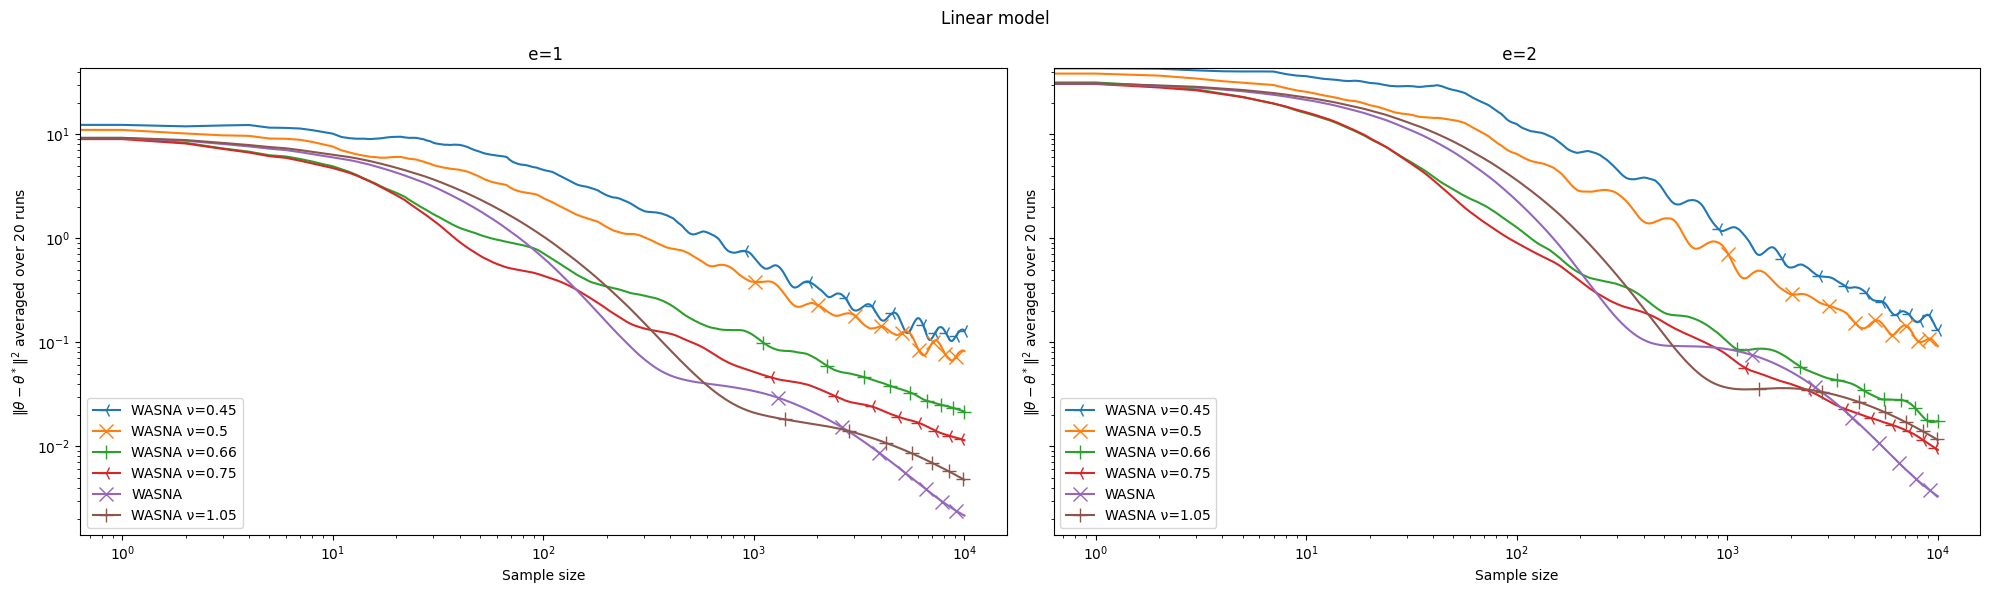

In [ ]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

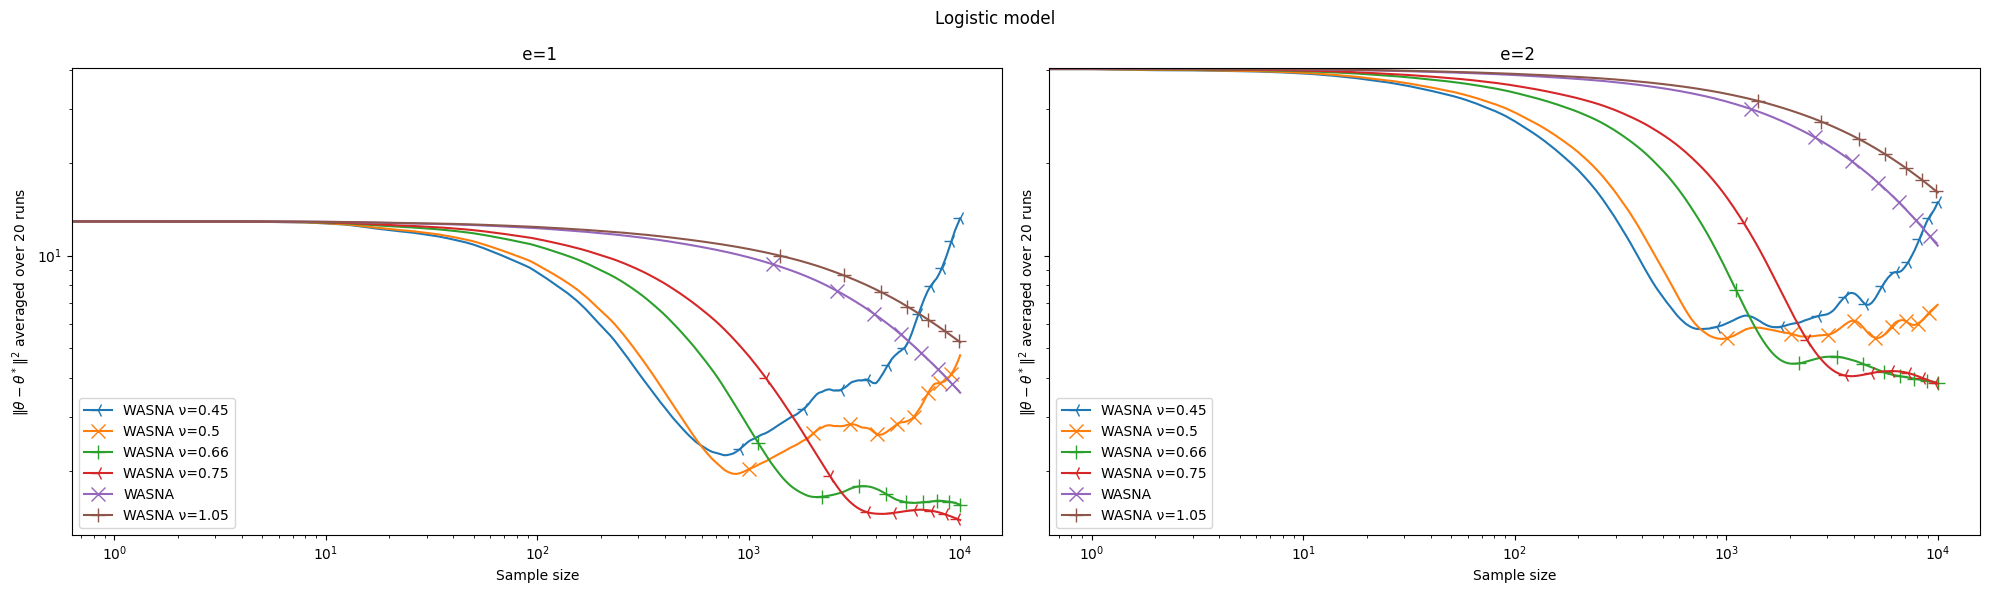

In [ ]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

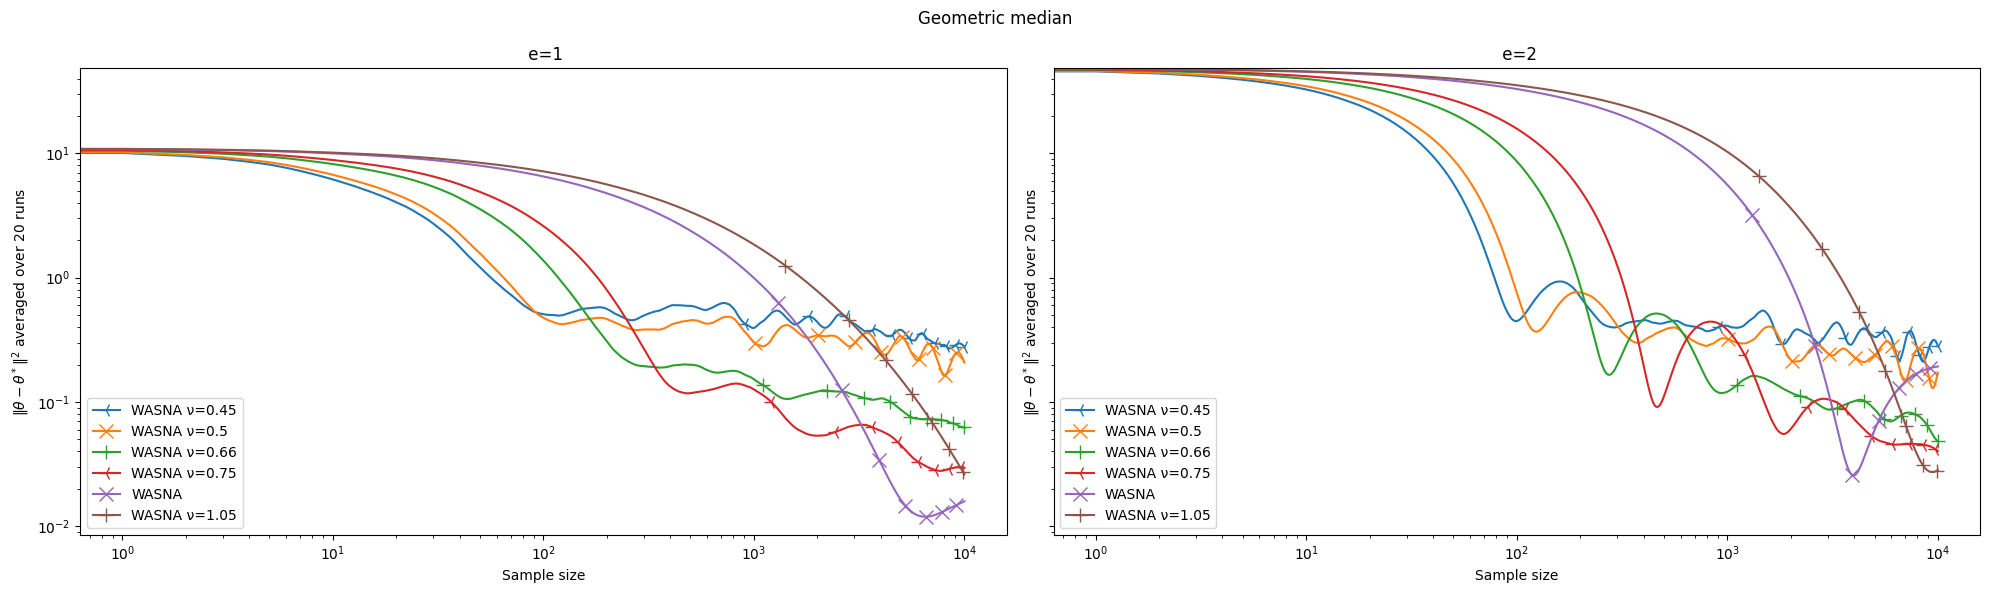

In [ ]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

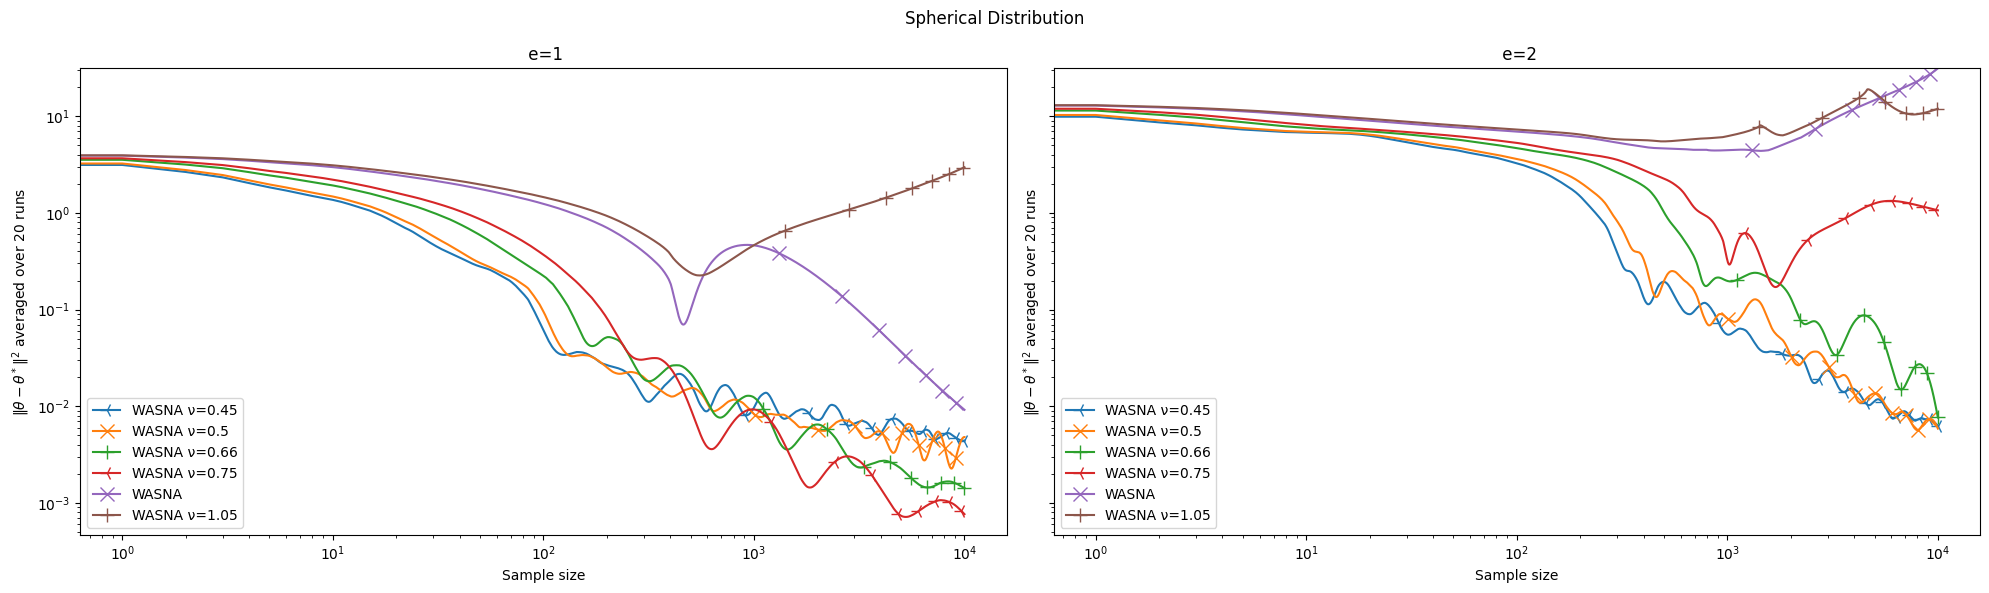

In [ ]:
simulation = simulation_spherical_distribution(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

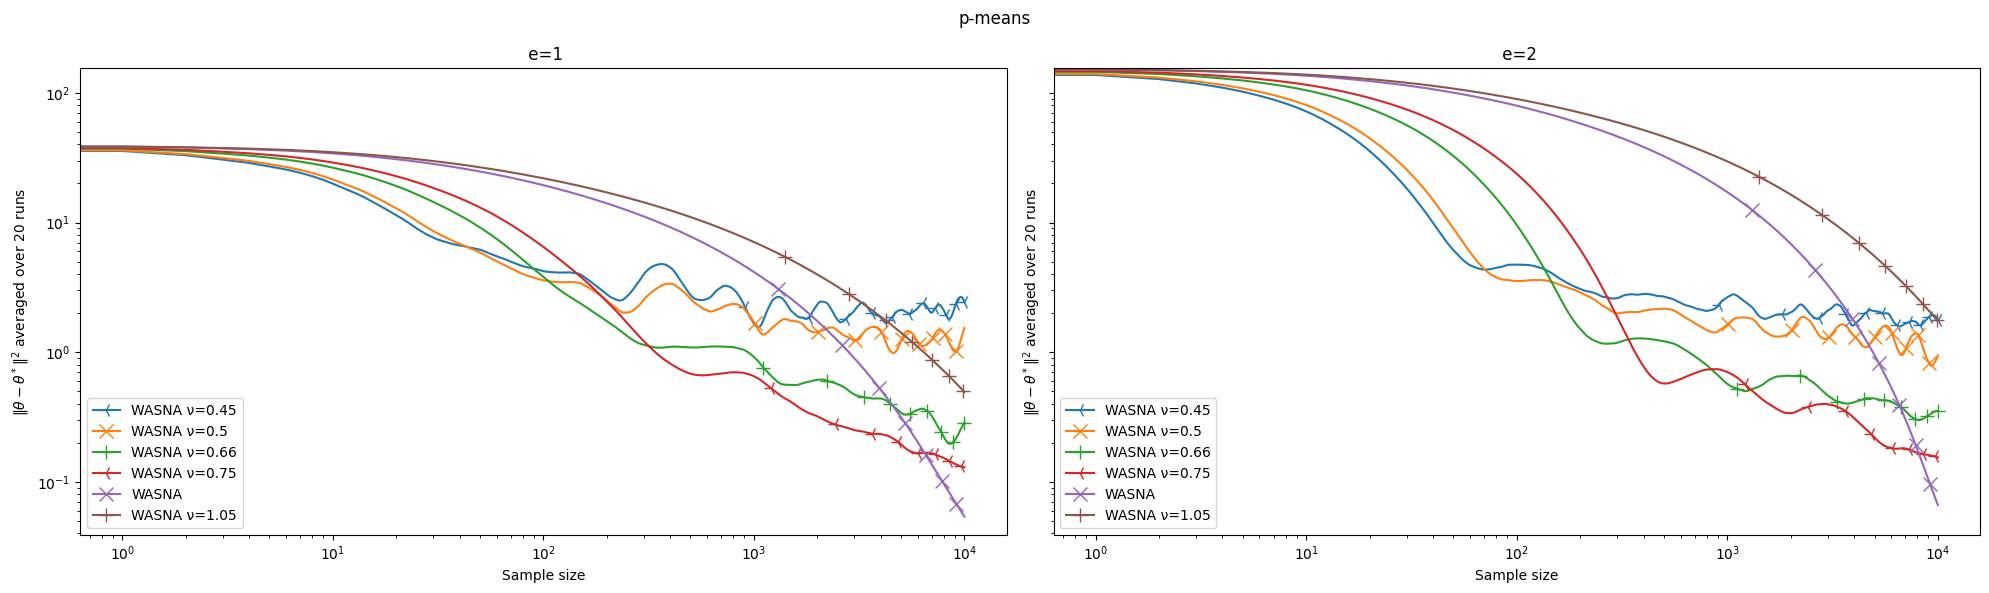

In [ ]:
simulation = simulation_p_means(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

In [ ]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]